In [3]:
import numpy as np
import pywt
import pywt.data
import matplotlib.pyplot as plt
import soundfile as sf
import cv2

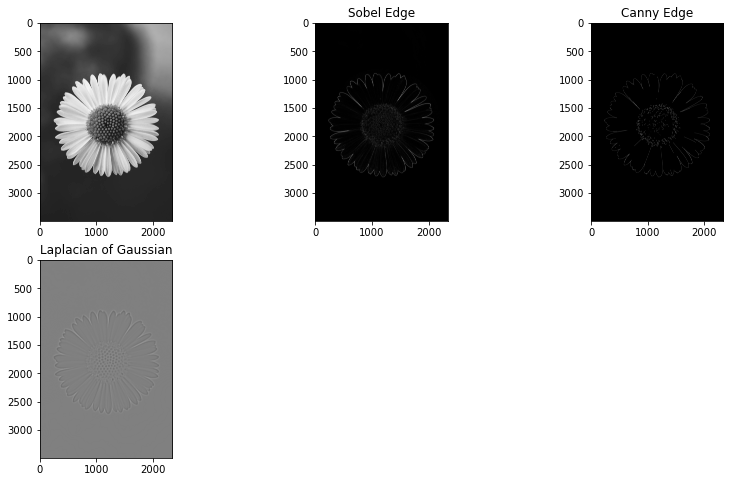

In [4]:
#task1

image = cv2.imread(r"F:\Uni Work\CV Lab\Lab 7\flower1.jpg", cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
edge_image = cv2.magnitude(sobel_x, sobel_y)

canny_edge_image = cv2.Canny(image, 100, 200)

sigma = 10
smoothed_image = cv2.GaussianBlur(image, (0, 0), sigma)
laplacian = cv2.Laplacian(smoothed_image, cv2.CV_64F)

plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap = "gray")

plt.subplot(2, 3, 2)
plt.imshow(edge_image, cmap = "gray")
plt.title('Sobel Edge')

plt.subplot(2, 3, 3)
plt.imshow(canny_edge_image, cmap = "gray")
plt.title('Canny Edge')

plt.subplot(2, 3, 4)
plt.imshow(laplacian, cmap = "gray")
plt.title('Laplacian of Gaussian')

plt.show()

D:\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


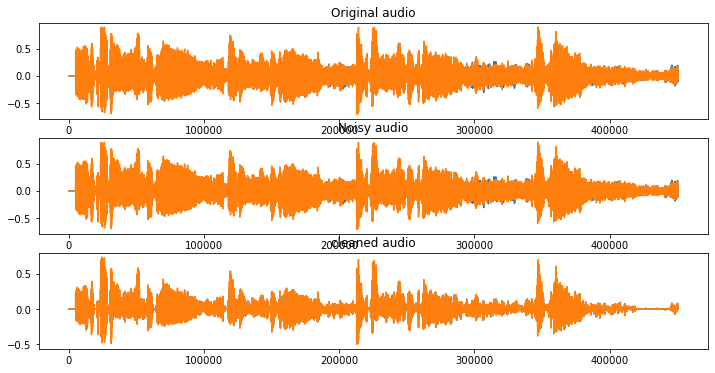

In [5]:
#task2

audio, sample_rate = sf.read(r"F:\Uni Work\CV Lab\Lab 7\recording.mp3")

wavelet = "db4"
level = 5

coeffs = pywt.wavedec(audio, wavelet, level=level)

threshold = 0.45

thresholded_coeffs = [pywt.threshold(c, threshold, mode="soft") for c in coeffs]

denoised_audio = pywt.waverec(thresholded_coeffs, wavelet)

sf.write(r"F:\Uni Work\CV Lab\Lab 7\clean.mp3", denoised_audio, sample_rate)


import sounddevice as sd
sd.play(denoised_audio, sample_rate)
sd.wait()


plt.figure(figsize=(12,6))
plt.subplot(3, 1, 1)
plt.title("Original audio")
plt.plot(audio)

plt.subplot(3, 1, 2)
plt.title("Noisy audio")
plt.plot(audio)

plt.subplot(3, 1, 3)
plt.title("cleaned audio")
plt.plot(denoised_audio)

plt.show()

In [6]:
import cv2

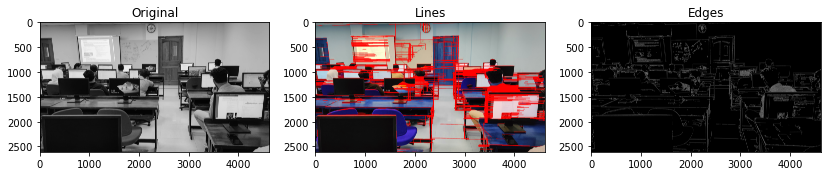

In [7]:
#task 3

img = cv2.imread(r"F:\Uni Work\CV Lab\Lab 7\img1.jpg", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 200)

lines = cv2.HoughLinesP(edges, 0.2, np.pi/180, 70, minLineLength=8, maxLineGap=100)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
   
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap="gray")
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(img, cmap="gray")
plt.title("Lines")

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap="gray")
plt.title("Edges")

plt.show()

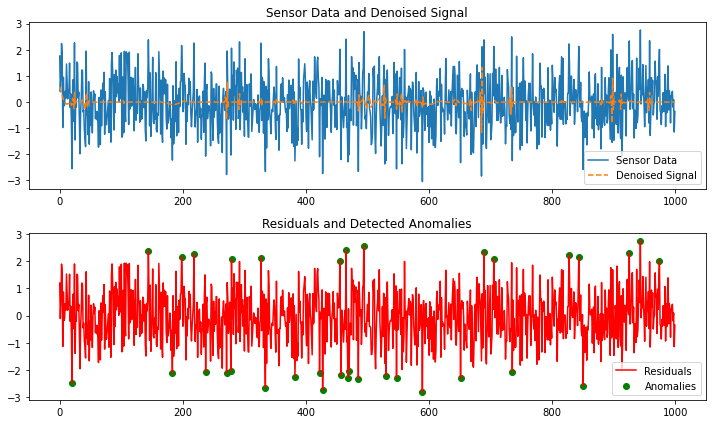

anomalies: [ 20 144 183 198 218 237 271 278 279 327 334 382 422 427 455 457 465 468
 470 485 494 530 547 589 651 689 705 735 827 843 850 925 943 974]


In [8]:
#task4

np.random.seed(0)
sensor_data = np.random.normal(0, 1, 1000)

wavelet ="db4"
level = 4

coeffs = pywt.wavedec(sensor_data, wavelet, level=level)

threshold = 2.0

thresholded_coeffs = [pywt.threshold(c, threshold, mode="soft") for c in coeffs]

denoised_signal = pywt.waverec(thresholded_coeffs, wavelet)

residuals = sensor_data - denoised_signal

anomalies = np.where(np.abs(residuals) > threshold)[0]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(sensor_data, label="Sensor Data")
plt.plot(denoised_signal, label="Denoised Signal", linestyle="--")
plt.legend()
plt.title("Sensor Data and Denoised Signal")

plt.subplot(2, 1, 2)
plt.plot(residuals, label="Residuals", color="red")
plt.scatter(anomalies, residuals[anomalies], color="green", label="Anomalies")
plt.legend()
plt.title("Residuals and Detected Anomalies")

plt.tight_layout()
plt.show()


print("anomalies:", anomalies)

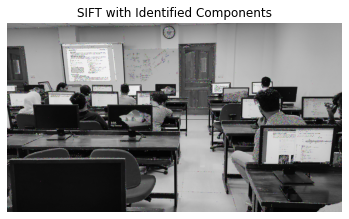

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(r"F:\Uni Work\CV Lab\Lab 7\img1.jpg", cv2.IMREAD_GRAYSCALE)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect the keypoints and compute the descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Create a dictionary to store the keypoints and descriptors of each computer component
computer_components = {}
for keypoint, descriptor in zip(keypoints, descriptors):
    # Store the descriptors with their corresponding keypoint locations
    computer_components[tuple(keypoint.pt)] = descriptor

# Create a sample database of known computer components with descriptors
database = {
    "Monitor": [],     # Initialize an empty list for Monitor descriptors
    "Keyboard": [],    # Initialize an empty list for Keyboard descriptors
    # Add other components as needed
}

# Initialize the Brute-Force Matcher
bf = cv2.BFMatcher()

# Iterate over the components and match their descriptors with the database
for component, descriptors in database.items():
    for desc in descriptors:
        matches = bf.knnMatch(np.asarray(desc, np.float32), np.asarray(descriptors, np.float32), k=2)
        good_matches = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:  # Adjust the threshold as needed
                good_matches.append(m)

        if len(good_matches) > 10:  # Adjust the threshold as needed
            print(f"Component '{component}' identified.")

# Maintain an inventory based on the identified and labeled computer systems and components
# Update the inventory based on the identified computer systems and components

# Draw the keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints and identified components
plt.imshow(image_with_keypoints, cmap='gray')
plt.title("SIFT with Identified Components")
plt.axis('off')
plt.show()


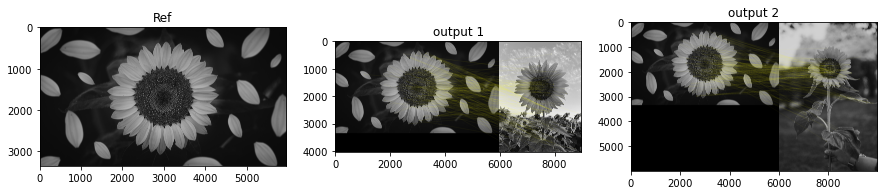

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ref = cv2.imread('sunf1.jpg', 0)
test_images = [cv2.imread('sunf2.jpg', 0), cv2.imread('sunf3.jpg', 0)]

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(ref, None)

fig, axs = plt.subplots(1, len(test_images) + 1, figsize=(15, 6))

axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Ref')

for i, test_image in enumerate(test_images):
    kp2, des2 = sift.detectAndCompute(test_image, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.8 * n.distance:
            good_matches.append(m)

    if len(good_matches) > 5:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()

        h, w = ref.shape
        pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
        dst = cv2.perspectiveTransform(pts, M)

        test_image = cv2.polylines(test_image, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    output_image = np.zeros((max(ref.shape[0], test_image.shape[0]), ref.shape[1] + test_image.shape[1], 3), dtype='uint8')
    output_image[:ref.shape[0], :ref.shape[1]] = np.dstack([ref, ref, ref])
    output_image[:test_image.shape[0], ref.shape[1]:] = np.dstack([test_image, test_image, test_image])

    for mat in good_matches:
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx
        (x1, y1) = kp1[img1_idx].pt
        (x2, y2) = kp2[img2_idx].pt

        cv2.circle(output_image, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_image, (int(x2) + ref.shape[1], int(y2)), 4, (0, 255, 255), 1)
        cv2.line(output_image, (int(x1), int(y1)), (int(x2) + ref.shape[1], int(y2)), (0, 255, 255), 1)

    axs[i + 1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    axs[i + 1].set_title(f'output {i + 1}')

plt.show()


In [11]:
#task2

import cv2
import numpy as np

image_paths = ["i1.jpeg", "i2.jpeg", "i3.jpeg", "i4.jpeg"]

# Initialize SIFT
sift = cv2.SIFT_create()

# Initialize the first image
stitched_image = cv2.imread(image_paths[0], cv2.IMREAD_COLOR)

for i in range(1, len(image_paths)):
    # Load the next image
    image2 = cv2.imread(image_paths[i], cv2.IMREAD_COLOR)

    # Detect and compute keypoints and descriptors for both images
    keypoints1, descriptors1 = sift.detectAndCompute(stitched_image, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    # Create a BFMatcher (Brute-Force Matcher)
    bf = cv2.BFMatcher()

    # Match descriptors between the two images
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # If there are enough good matches, consider it a match
    if len(good_matches) > 10:  # You can adjust this threshold
        # Extract matched keypoints' coordinates
        pts1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        pts2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Find the perspective transformation (homography) between the two images
        M, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC, 5.0)

        # Warp the second image to align with the first image
        image2_warped = cv2.warpPerspective(image2, M, (stitched_image.shape[1] + image2.shape[1], stitched_image.shape[0]))

        # Append the two images horizontally
        stitched_image = cv2.hconcat([stitched_image, image2_warped])

# Save the final stitched image
cv2.imwrite("panoramic.jpg", stitched_image)

True

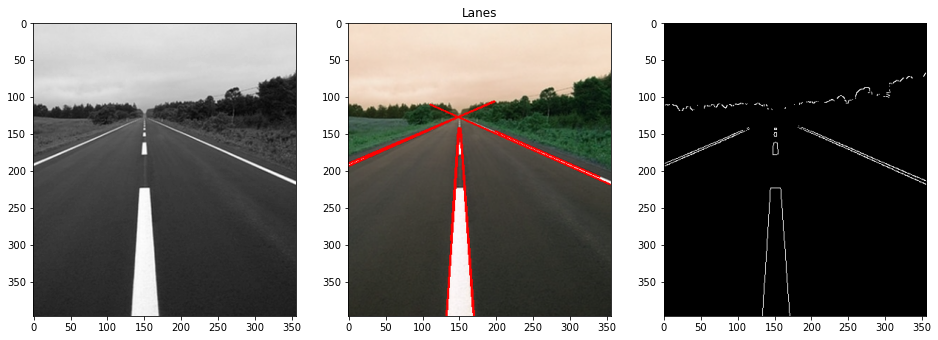

In [12]:
#task3

img = cv2.imread(r'F:\Uni Work\CV Lab\Lab 7\road.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 500, 530)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=5, maxLineGap=100)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
plt.figure(figsize=(16, 10))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(img, cmap="gray")
plt.title("Lanes")

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap="gray")

plt.show()

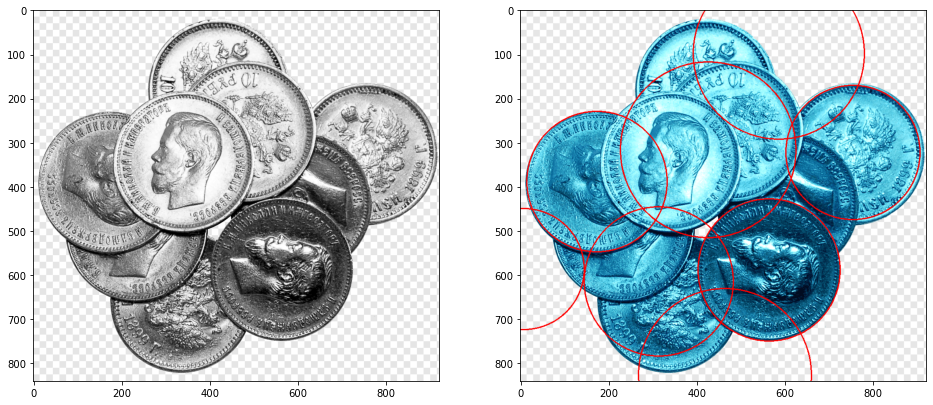

In [13]:
#task4

img = cv2.imread(r'F:\Uni Work\CV Lab\Lab 7\img3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 250, param1 = 60, param2 = 39, minRadius = 120, maxRadius = 200)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), 2)
        
        
plt.figure(figsize = (16, 10))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')

plt.show()

In [14]:
#task5

import cv2

cap = cv2.VideoCapture(r'F:\Uni Work\CV Lab\Lab 7\footage.mp4')

if not cap.isOpened():
    print("Error: Video file not found or could not be opened.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    edges = cv2.Canny(blurred, 120.09, 120.1)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)

        if area > 75:
            cv2.drawContours(frame, [contour], -1, (0, 0, 255), 2)

    cv2.imshow('detection', frame)

    if len(contours) > 0:
        print("Unauthorized object detected!!!")

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthorized object detected!!!
Unauthor

In [20]:
import cv2

ref = cv2.imread(r'F:\Uni Work\CV Lab\Lab 7\ref.png', cv2.IMREAD_GRAYSCALE)

face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(r'F:\Uni Work\CV Lab\Lab 7\footage3.mp4')

while True:
    ret, frame = cap.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()